In [1]:
import numpy as np
import pandas as pd
from pandas import plotting
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as sk_LDA

In [2]:
# Load iris data
iris = datasets.load_iris()
X = iris.data
labels = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
# df = df.apply(lambda x: (x-x.mean())/x.std(), axis=0)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Contribution: [0.9912126 0.0087874]


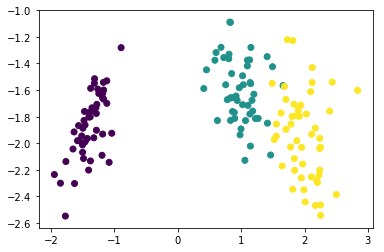

In [3]:
class LDA:
    def fit(self, x, labels):
        """
            x: (n, h)
            labels: (n, )
        
        """
        h = x.shape[1]
        mu_all = x.mean(axis=0, keepdims=True)
        label_to_id = {}
        classes = np.unique(labels)
        num_c = {}
        mu_c = {}
        for c in classes:
            indices = np.where(labels==c)[0]
            num_c[c] = len(indices)
            mu_c[c] = x[indices].mean(axis=0, keepdims=True)
        
        S_B = np.zeros((h, h))
        S_W = np.zeros((h, h))
        for c in classes:
            S_B += (mu_c[c]-mu_all).T * (mu_c[c]-mu_all)
            
            indices = np.where(labels==c)[0]
            S_W += (x[indices]-mu_c[c]).T.dot((x[indices]-mu_c[c]))
        
        eig_val, eig_vec = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
        eig_val = eig_val.real
        eig_vec = eig_vec.real
        indices = np.argsort(-eig_val)
        self.contribution = eig_val[indices] / np.sum(eig_val)
        self.components = eig_vec[indices, :]
    
    def transform(self, x, k):
        res = np.dot(x, self.components[:, :k])
        return res
    
lda = LDA()        
lda.fit(X, labels)
print('Contribution:', lda.contribution[:2]/lda.contribution[:2].sum())
y = lda.transform(X, 2)
plt.scatter(y[:, 0], y[:, 1], c=iris.target)
# print(lda.components)

Contributions: [0.9912126 0.0087874]


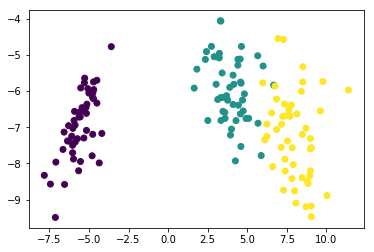

In [4]:
# Use scikit-learn implementation
# https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
lda = sk_LDA(solver='eigen', n_components=2)
lda.fit(X, labels)
y = -1 * lda.transform(X) # (N, h)
print('Contributions:', lda.explained_variance_ratio_)
# print(lda.scalings_[:, :2])
plt.scatter(y[:, 0], y[:, 1], c=labels)